The Quality of Life Index (higher is better) is an estimation of the overall quality of life by using an empirical formula that takes into account the following factors:

- Purchasing Power Index: This index indicates the relative purchasing power in a given city based on the average net salary. A domestic purchasing power of 40 means that residents with an average salary can afford, on average, 60% less goods and services compared to residents of New York City with an average salary.
- Pollution Index (lower is better)
- House Price to Income Ratio (lower is better)
- Cost of Living Index: This index indicates the relative prices of consumer goods like groceries, restaurants, transportation, and utilities. It excludes accommodation expenses such as rent or mortgage. For instance, a city with a Cost of Living Index of 120 is estimated to be 20% more expensive than New York City (excluding rent).
- Safety Index (higher is better)
- Health Care Index (higher is better)
- Traffic Commute Time Index: is a composite measure that that considers factors such as commute time, dissatisfaction with time spent in traffic, CO2 emissions, and overall traffic system inefficiencies. It provides insights into the overall traffic conditions in a city.
- Climate Index (higher is better)

Indexes explanation: [Numbeo](https://www.numbeo.com/quality-of-life/indices_explained.jsp)

[Data collection policy](https://www.numbeo.com/common/motivation_and_methodology.jsp)

- Purchasing Power Index `PP`
- *Negative* Pollution Index `POL`
- House Price to Income Ratio (lower is better) ( i don't really care about this one)
- Cost of Living Index (lower is better) `CoL`
- Safety Index  `S`
- Health Care Index `HC` 
- Traffic Commute Time Index (lower is better) `COM`
- Climate Index (higher is better) `CLIM`

In [211]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [212]:
ideal_data = {
    "PP": 200.0,  # Local Purchasing Power: the higher the better
    "POL": 100.0,  # Pollution: the lower the better. worst case scenario is 100
    "CoL": 100.0,  # Cost of Living: the lower the better. worst case scenario is 100
    "SAF": 100.0,  # Safety: the higher the better
    "HC": 100.0,  #  Health Care: the higher the better
    "COM": 300.0,  # traffic/commute time: the lower the better. worst case secenario is 300
    "CLIM": 100.0  # the higher the better
}


In [213]:
cph_data = {
    "PP": 117.0,  # Replace with actual value
    "POL": 22.6,  # Replace with actual value
    "CoL": 79.0,  # Replace with actual value
    "SAF": 73.8,  # Replace with actual value
    "HC": 76.6,  # Replace with actual value
    "COM": 85.2,  # Replace with actual value
    "CLIM": 83.74  # the higher the better
}


In [214]:
cdmx_data = {
    "PP": 38.8,  # Replace with actual value
    "POL": 81.1,  # Replace with actual value
    "CoL": 47.3,  # Replace with actual value
    "SAF": 32.2,  # Replace with actual value
    "HC": 66.0,  # Replace with actual value
    "COM": 251.9,  # Replace with actual value
    "CLIM": 92.37  # Replace with actual value
}


In [215]:
mil_data = {
    "PP": 58.6,  # Replace with actual value
    "POL": 67.6,  # Replace with actual value
    "CoL": 69.7,  # Replace with actual value
    "SAF": 48.3,  # Replace with actual value
    "HC": 71.1,  # Replace with actual value
    "COM": 130.9,  # Replace with actual value
    "CLIM": 88.12  # Replace with actual value
}


In [216]:
sea_data = {
    "PP": 160.8,  # Replace with actual value
    "POL": 38.5,  # Replace with actual value
    "CoL": 87.7,  # Replace with actual value
    "SAF": 45.4,  # Replace with actual value
    "HC": 66.1,  # Replace with actual value
    "COM": 226.0,  # Replace with actual value
    "CLIM": 92.73  # Replace with actual value
}


In [217]:
paris_data = {
    "PP": 93.3,  # Replace with actual value
    "POL": 64.2,  # Replace with actual value
    "CoL": 75.4,  # Replace with actual value
    "SAF": 42.1,  # Replace with actual value
    "HC": 78.0,  # Replace with actual value
    "COM": 149.1,  # Replace with actual value
    "CLIM": 90.40  # Replace with actual value
}


In [218]:
data = {'Copenhagen': cph_data, 'Mexico City': cdmx_data, 'Milan': mil_data, 'Seattle': sea_data, 'Paris': paris_data}


# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Subtract the "lower is better" metrics from the ideal value
for city in df.columns:
    df[city] = df.apply(lambda row: ideal_data[row.name] - row[city] if row.name in ['POL', 'CoL', 'COM'] else row[city], axis=1)


df

,Copenhagen,Mexico City,Milan,Seattle,Paris
PP,117.00,38.80,58.60,160.80,93.3
POL,77.40,18.90,32.40,61.50,35.8
CoL,21.00,52.70,30.30,12.30,24.6
SAF,73.80,32.20,48.30,45.40,42.1
HC,76.60,66.00,71.10,66.10,78.0
COM,214.80,48.10,169.10,74.00,150.9
CLIM,83.74,92.37,88.12,92.73,90.4


In [219]:
pd.Series(ideal_data)

PP      200.0
POL     100.0
CoL     100.0
SAF     100.0
HC      100.0
COM     300.0
CLIM    100.0
dtype: float64

In [220]:

# Normalize the data
# Subtract the "lower is better" metrics from the ideal value
df_normalized = df.copy()
for city in df.columns:
    df_normalized[city] = df_normalized.apply(lambda row: row[city]/ ideal_data[row.name], axis=1)



In [221]:
df_normalized

,Copenhagen,Mexico City,Milan,Seattle,Paris
PP,0.5850,0.194000,0.293000,0.804000,0.4665
POL,0.7740,0.189000,0.324000,0.615000,0.3580
CoL,0.2100,0.527000,0.303000,0.123000,0.2460
SAF,0.7380,0.322000,0.483000,0.454000,0.4210
HC,0.7660,0.660000,0.711000,0.661000,0.7800
COM,0.7160,0.160333,0.563667,0.246667,0.5030
CLIM,0.8374,0.923700,0.881200,0.927300,0.9040


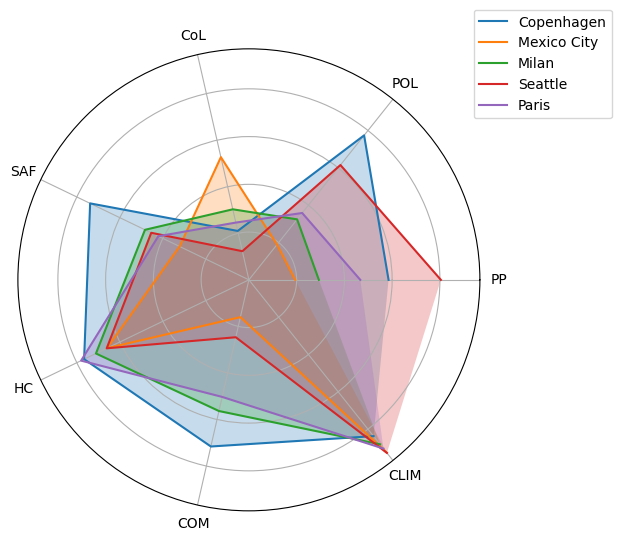

In [222]:
# Append the first row to the end of the DataFrame to close the loop
# df_normalized = pd.concat([df_normalized, df_normalized.iloc[[0]]])

dataframe = df_normalized[['Copenhagen', 'Mexico City', 'Milan']]

# Create a list of categories (index names)
categories = list(df_normalized.index)

# Create a radar chart
labels = np.array(df_normalized.index)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# angles += angles[:1]  # Complete the loop


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for city, values in df_normalized.items():
    values = values.tolist()
    # values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=city)
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()